In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
#Importing the csv file
data = pd.read_csv ("E:\Project University\eighteen-nineteen-university-datasets.csv", encoding = 'unicode_escape')
data

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [3]:
#Defining a data frame
df = pd.DataFrame(data)

In [4]:
#Checking the dataset type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [5]:
#ِAssigning numeric values to >1000 values in Alumni Employment, Research Output, Quality Publications, Influence, Citations columns
 
# Alumni Employment
df.loc[df["Alumni Employment"] == "> 1000", "Alumni Employment"] = 1001

# Research Output
df.loc[df["Research Output"] == "> 1000", "Research Output"] = 1001

# Quality Publications
df.loc[df["Quality Publications"] == "> 1000", "Quality Publications"] = 1001

# Influence
df.loc[df["Influence"] == "> 1000", "Influence"] = 1001

# Citations
df.loc[df["Citations"] == "> 1000", "Citations"] = 1001

In [6]:
df

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,1001,-,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,-,1001,-,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,1001,-,881,1001,1001,898,69.8


In [7]:
print(df.columns.tolist())

['World Rank', 'Institution', 'Location', 'National Rank', 'Quality\xa0of Education', 'Alumni Employment', 'Quality\xa0of Faculty', 'Research Output', 'Quality Publications', 'Influence', 'Citations', 'Score']


In [8]:
#cleaning the column names from special characters
df.columns = [s.replace(u'\xa0', ' ') for s in df.columns]

In [9]:
print(df.columns.tolist())

['World Rank', 'Institution', 'Location', 'National Rank', 'Quality of Education', 'Alumni Employment', 'Quality of Faculty', 'Research Output', 'Quality Publications', 'Influence', 'Citations', 'Score']


In [10]:
df[df['Quality of Education'] == '-'] 

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
21,22,"University of California, San Francisco",USA,17,-,1001,13,45,23,8,17,87.7
59,60,Seoul National University,South Korea,1,-,20,-,19,39,146,129,83.7
79,80,Emory University,USA,47,-,197,164,101,66,55,63,82.5
88,89,University of Texas MD Anderson Cancer Center,USA,49,-,1001,91,158,104,70,66,82.0
93,94,Baylor College of Medicine,USA,51,-,1001,141,161,118,38,53,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,University of Macau,Macau,1,-,512,-,883,816,1001,1001,69.8
995,996,Aga Khan University,Pakistan,3,-,1001,-,1001,1001,464,673,69.8
997,998,K?chi University,Japan,56,-,1001,-,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,1001,-,881,1001,1001,898,69.8


In [11]:
#Copying dataset to new variable
df2 = df.copy()

In [12]:
df2

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,1001,-,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,-,1001,-,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,1001,-,881,1001,1001,898,69.8


In [13]:
# Replacing - with NaN value
df2['Quality of Education'] = df2['Quality of Education'].replace(['-'], np.nan )
df2['Quality of Faculty'] = df2['Quality of Faculty'].replace(['-'], np.nan )

In [14]:
df2

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,NaN,1001,NaN,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,NaN,1001,NaN,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,NaN,1001,NaN,881,1001,1001,898,69.8


In [15]:
#Print how many missing value we have before interpolate
print('Missing Value in Quality of Education is: ', df2['Quality of Education'].isnull().sum())
print('Missing Value in Quality of Faculty is: ', df2['Quality of Faculty'].isnull().sum())

Missing Value in Quality of Education is:  597
Missing Value in Quality of Faculty is:  731


In [16]:
############################################## Interpolating ############################################################

In [17]:
# Split data in training (not NaN values) and missing (NaN values)
missing = df2.isna().any(axis=1)
df_training = df[~missing]
df_missing = df[missing].reset_index(drop=True)

# Create function that interpolate missing value (from our training values)
f = interp1d(df_training.Score, df_training["Quality of Faculty"])

# Interpolate the missing values
df_missing["Quality of Faculty"] = f(df_missing.Score)

#Merge two dataframe into one dataframe.
df3 = df_training.append(df_missing)
df3.reset_index(drop=True, inplace=True)

C:\Users\Hadi\AppData\Local\Temp\ipykernel_13472\1431960744.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df_training.append(df_missing)


In [18]:
# Replacing - with NaN values
df3['Quality of Faculty'] = df3['Quality of Faculty'].replace(['-'], np.nan )

In [19]:
df3

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,University of Macau,Macau,1,-,512,296.0,883,816,1001,1001,69.8
996,996,Aga Khan University,Pakistan,3,-,1001,296.0,1001,1001,464,673,69.8
997,998,K?chi University,Japan,56,-,1001,296.0,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,1001,296.0,881,1001,1001,898,69.8


In [20]:
# Changing string values in categorizing columns to integer
df3['Quality of Faculty'] = df3['Quality of Faculty'].astype('int')

In [21]:
df4 =df3.copy()
df4

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,University of Macau,Macau,1,-,512,296,883,816,1001,1001,69.8
996,996,Aga Khan University,Pakistan,3,-,1001,296,1001,1001,464,673,69.8
997,998,K?chi University,Japan,56,-,1001,296,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,1001,296,881,1001,1001,898,69.8


In [22]:
#Replacing - with NaN values
df4['Quality of Education'] = df4['Quality of Education'].replace(['-'], np.nan )
df4

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,University of Macau,Macau,1,NaN,512,296,883,816,1001,1001,69.8
996,996,Aga Khan University,Pakistan,3,NaN,1001,296,1001,1001,464,673,69.8
997,998,K?chi University,Japan,56,NaN,1001,296,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,NaN,1001,296,881,1001,1001,898,69.8


In [23]:
# Split data in training (not NaN values) and missing (NaN values)
missing = df4.isna().any(axis=1)
df_training = df4[~missing]
df_missing = df4[missing].reset_index(drop=True)

# Create function that interpolate missing value (from our training values)
f = interp1d(df_training.Score, df_training["Quality of Education"])


# Interpolate the missing values
df_missing["Quality of Education"] = f(df_missing.Score)

#Merge two dataframe into one dataframe.
df5 = df_training.append(df_missing)
df5.reset_index(drop=True, inplace=True)

C:\Users\Hadi\AppData\Local\Temp\ipykernel_13472\3952849374.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df_training.append(df_missing)


In [24]:
df5

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,University of Macau,Macau,1,180.0,512,296,883,816,1001,1001,69.8
996,996,Aga Khan University,Pakistan,3,180.0,1001,296,1001,1001,464,673,69.8
997,998,K?chi University,Japan,56,180.0,1001,296,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,180.0,1001,296,881,1001,1001,898,69.8


In [25]:
#Print how many missing value we have after interpolate
print('Missing Value in Quality of Education is: ', df5['Quality of Education'].isnull().sum())

Missing Value in Quality of Education is:  0


In [26]:
# Changing string values in categorizing columns to integer
df5['Quality of Education'] = df5['Quality of Education'].astype('int')

In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   int32  
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   int32  
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 86.1+ KB


In [28]:
#Changing columns type
df5['Alumni Employment'] = df5['Alumni Employment'].astype('int')
df5['Research Output'] = df5['Research Output'].astype('int')
df5['Quality Publications'] = df5['Quality Publications'].astype('int')
df5['Influence'] = df5['Influence'].astype('int')
df5['Citations'] = df5['Citations'].astype('int')

In [29]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   int32  
 5   Alumni Employment     1000 non-null   int32  
 6   Quality of Faculty    1000 non-null   int32  
 7   Research Output       1000 non-null   int32  
 8   Quality Publications  1000 non-null   int32  
 9   Influence             1000 non-null   int32  
 10  Citations             1000 non-null   int32  
 11  Score                 1000 non-null   float64
dtypes: float64(1), int32(7), int64(2), object(2)
memory usage: 66.5+ KB


In [30]:
# Eliminate the institution name column from the dataset
df6 = df5.drop(columns='Institution')
df6

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,USA,1,2,1,1,1,1,1,1,100.0
1,2,USA,2,10,3,2,10,4,3,2,96.7
2,3,USA,3,3,11,3,30,15,2,6,95.1
3,4,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Macau,1,180,512,296,883,816,1001,1001,69.8
996,996,Pakistan,3,180,1001,296,1001,1001,464,673,69.8
997,998,Japan,56,180,1001,296,1001,1001,811,673,69.8
998,999,South Korea,35,180,1001,296,881,1001,1001,898,69.8


In [31]:
#Changing Location column's type to string
df6['Location'] = df5['Location'].astype(pd.StringDtype())

In [32]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Location              1000 non-null   string 
 2   National Rank         1000 non-null   int64  
 3   Quality of Education  1000 non-null   int32  
 4   Alumni Employment     1000 non-null   int32  
 5   Quality of Faculty    1000 non-null   int32  
 6   Research Output       1000 non-null   int32  
 7   Quality Publications  1000 non-null   int32  
 8   Influence             1000 non-null   int32  
 9   Citations             1000 non-null   int32  
 10  Score                 1000 non-null   float64
dtypes: float64(1), int32(7), int64(2), string(1)
memory usage: 58.7 KB


In [33]:
df6

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,USA,1,2,1,1,1,1,1,1,100.0
1,2,USA,2,10,3,2,10,4,3,2,96.7
2,3,USA,3,3,11,3,30,15,2,6,95.1
3,4,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Macau,1,180,512,296,883,816,1001,1001,69.8
996,996,Pakistan,3,180,1001,296,1001,1001,464,673,69.8
997,998,Japan,56,180,1001,296,1001,1001,811,673,69.8
998,999,South Korea,35,180,1001,296,881,1001,1001,898,69.8


In [34]:
#Copying dataframe to new dataframe
df7 = df6.copy()

In [35]:
df7.describe()

,World Rank,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.02300,355.354000,726.528000,189.004000,508.454000,503.003000,529.156000,501.159000,75.034300
std,288.819436,49.22871,183.326144,343.686144,75.338861,300.080433,292.854863,322.419239,308.874517,4.670858
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.800000
25%,250.750000,6.00000,202.000000,425.750000,129.500000,250.750000,250.750000,250.750000,240.000000,71.500000
50%,500.500000,21.00000,359.000000,1001.000000,198.000000,500.500000,500.500000,502.500000,460.000000,73.750000
75%,750.250000,51.00000,500.000000,1001.000000,254.000000,754.250000,750.250000,814.750000,673.000000,77.300000
max,1000.000000,213.00000,666.000000,1001.000000,303.000000,1001.000000,1001.000000,1001.000000,1001.000000,100.000000


In [36]:
# Spliting non values columns
df8= pd.DataFrame(df7, columns=['Location'])

In [37]:
df8.describe()

,Location
count,1000
unique,61
top,USA
freq,213


In [38]:
import pandas_profiling as pp

In [39]:
University_Ranking_Profile= pp.ProfileReport(df7)
University_Ranking_Profile.to_file("Pandas_Profiling_Analysis_University_Ranking.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
#Grouping and counting location columns
cases= df7.groupby(['Location']).count()

#Slicing top countries (The score column's mean is 17)
cases[cases['Score']>= 17]

,World Rank,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
Location,,,,,,,,,,
Australia,25,25,25,25,25,25,25,25,25,25
Brazil,20,20,20,20,20,20,20,20,20,20
Canada,28,28,28,28,28,28,28,28,28,28
China,108,108,108,108,108,108,108,108,108,108
France,58,58,58,58,58,58,58,58,58,58
Germany,54,54,54,54,54,54,54,54,54,54
India,17,17,17,17,17,17,17,17,17,17
Italy,45,45,45,45,45,45,45,45,45,45
Japan,56,56,56,56,56,56,56,56,56,56


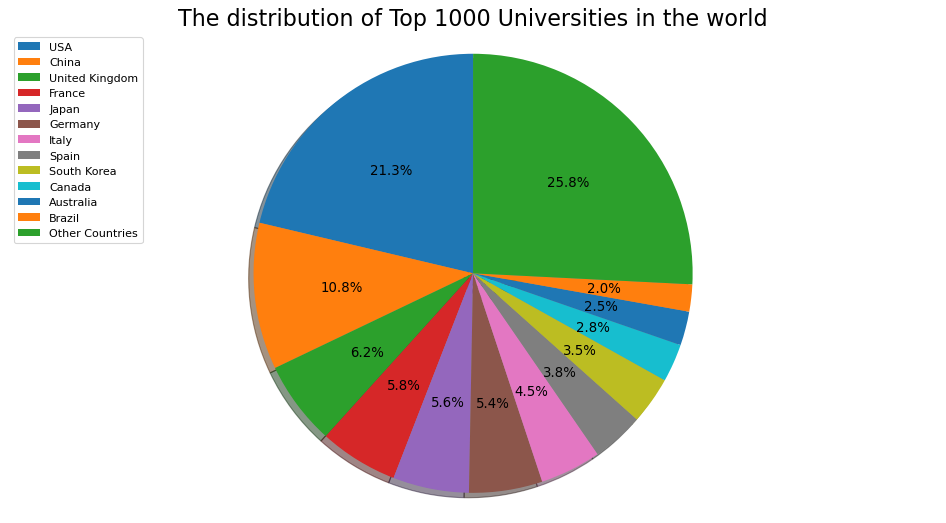

In [41]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

# First setting the threshold of devision (The mean of numbers)
tresh = 17 

# Having a dataframe which counts variable based on location.
a = df7['Location'].value_counts()

# Defining the second dataframe which first have those that are greather than threshold
b = a[a > tresh]

#Adding all the others as other countries bu sum the values
b['Other Countries'] = a[a <= tresh].sum()

#Drawing the Pie Chart
ax = b.plot.pie( autopct='%1.1f%%', labels=None , 
        shadow=True, startangle=90, textprops={'fontsize': 12})

ax.legend(loc=2, labels=b.index)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Eliminating y axis label
plt.ylabel("")

#Determining the Title
plt.title('The distribution of Top 1000 Universities in the world', fontsize=20)

#Saving the figure
plt.savefig('University_Location_piechart')

#Ahowing the figure
plt.show()

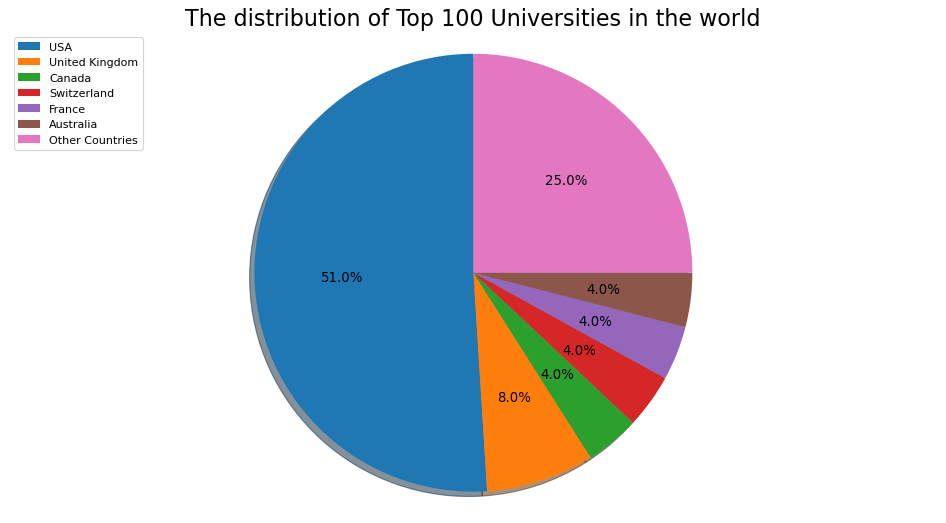

In [42]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

# First setting the threshold of devision (The mean is 3)
tresh = 3 

#Slicing top 100 universities
df9 = df6[df6['World Rank']<=100]

# Having a dataframe which counts variable based on location.
a = df9['Location'].value_counts()

# Defining the second dataframe which first have those that are greather than threshold
b = a[a > tresh]

#Adding all the others as other countries bu sum the values
b['Other Countries'] = a[a <= tresh].sum()

#Drawing the Pie Chart
ax = b.plot.pie( autopct='%1.1f%%', labels=None , 
        shadow=True, startangle=90, textprops={'fontsize': 12})

ax.legend(loc=2, labels=b.index)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Eliminating y axis label
plt.ylabel("")

#Determining the Title
plt.title('The distribution of Top 100 Universities in the world', fontsize=20)

#Saving the figure
plt.savefig('University_Location_piechart_Top100')

#Ahowing the figure
plt.show()

In [43]:
df7.columns

Index(['World Rank', 'Location', 'National Rank', 'Quality of Education',
       'Alumni Employment', 'Quality of Faculty', 'Research Output',
       'Quality Publications', 'Influence', 'Citations', 'Score'],
      dtype='object')

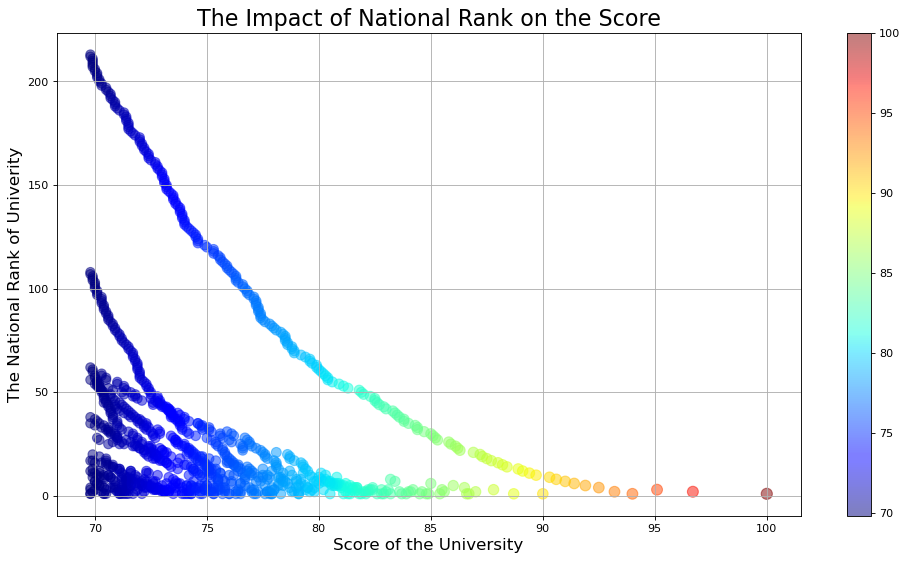

In [44]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with National Rank on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['National Rank'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The National Rank of Univerity", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of National Rank on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("National_Rank_VS_Score")

# Showing the plot on the screen
plt.show()

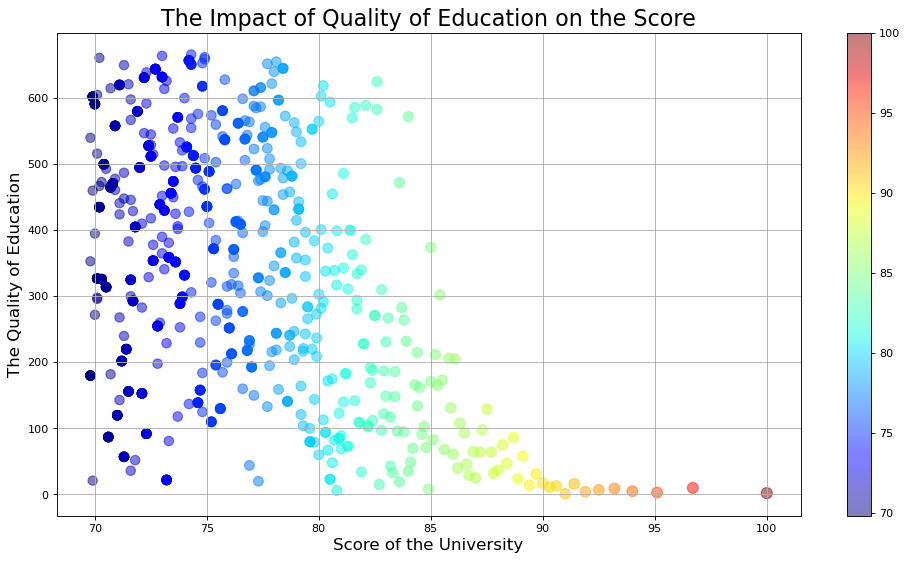

In [45]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Quality of Education on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['Quality of Education'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Quality of Education", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of Quality of Education on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Quality_of_Education_VS_Score")

# Showing the plot on the screen
plt.show()

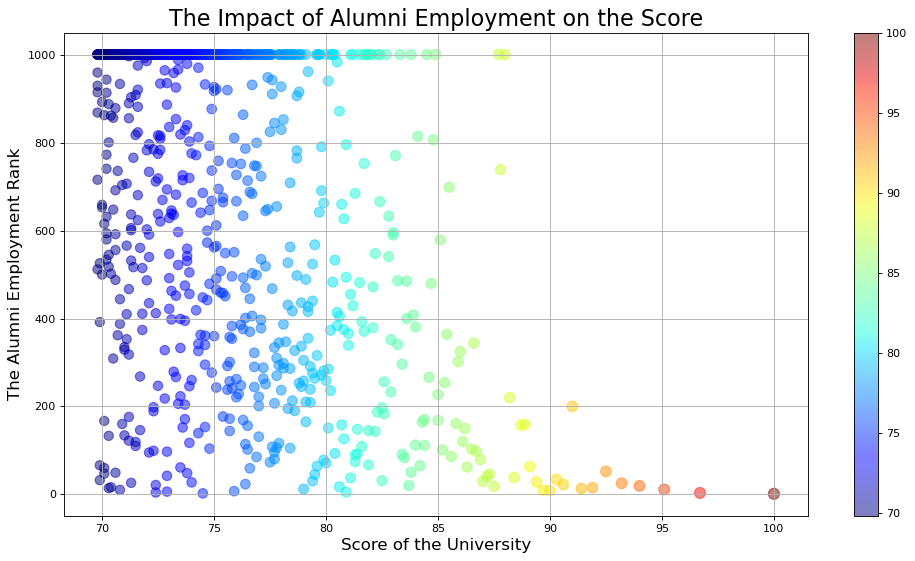

In [46]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Alumni Employment on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['Alumni Employment'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Alumni Employment Rank", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of Alumni Employment on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Alumni_Employment_VS_Score")

# Showing the plot on the screen
plt.show()

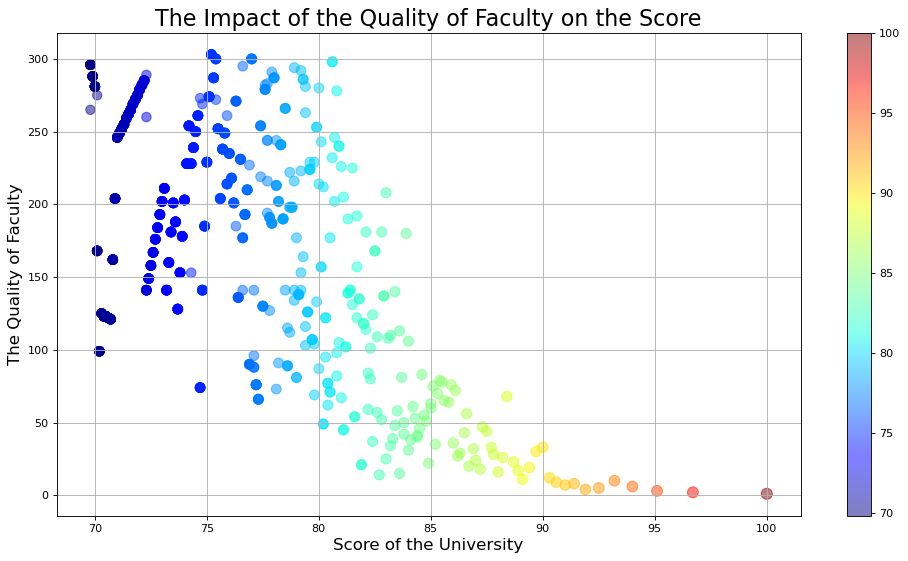

In [47]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Quality of Faculty on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['Quality of Faculty'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Quality of Faculty", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of the Quality of Faculty on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Quality_of_Faculty_VS_Score")

# Showing the plot on the screen
plt.show()

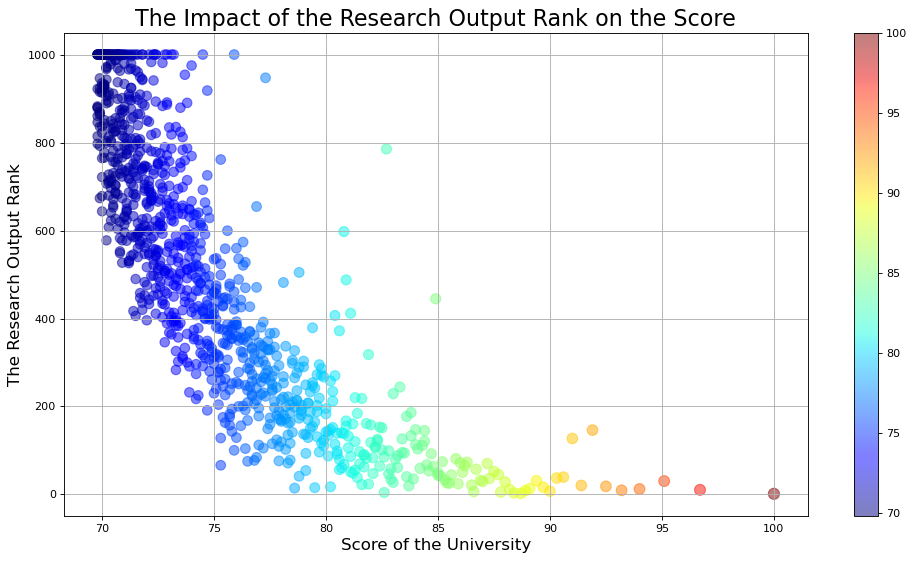

In [48]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Research Output on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['Research Output'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Research Output Rank", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of the Research Output Rank on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Research_Output_VS_Score")

# Showing the plot on the screen
plt.show()

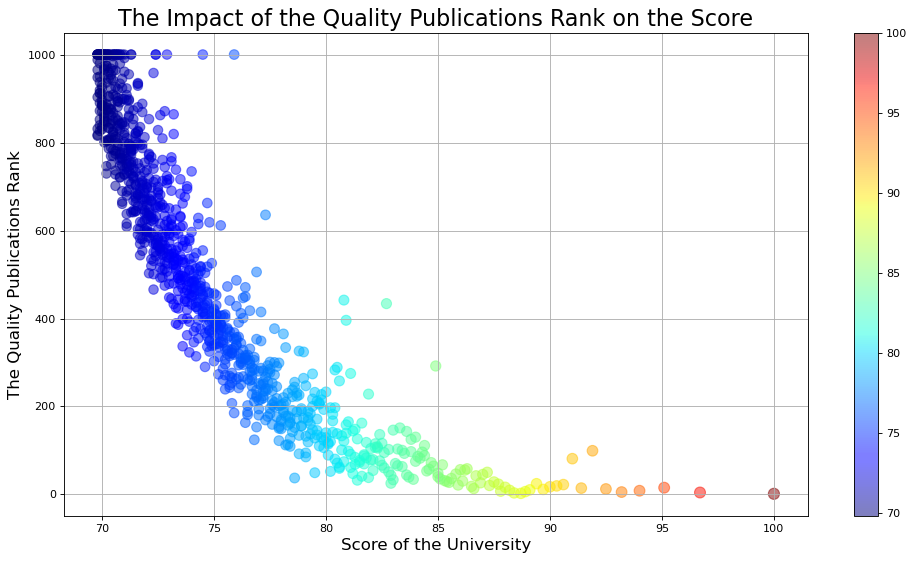

In [49]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Quality Publications on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['Quality Publications'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Quality Publications Rank", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of the Quality Publications Rank on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Quality_Publications_VS_Score")

# Showing the plot on the screen
plt.show()

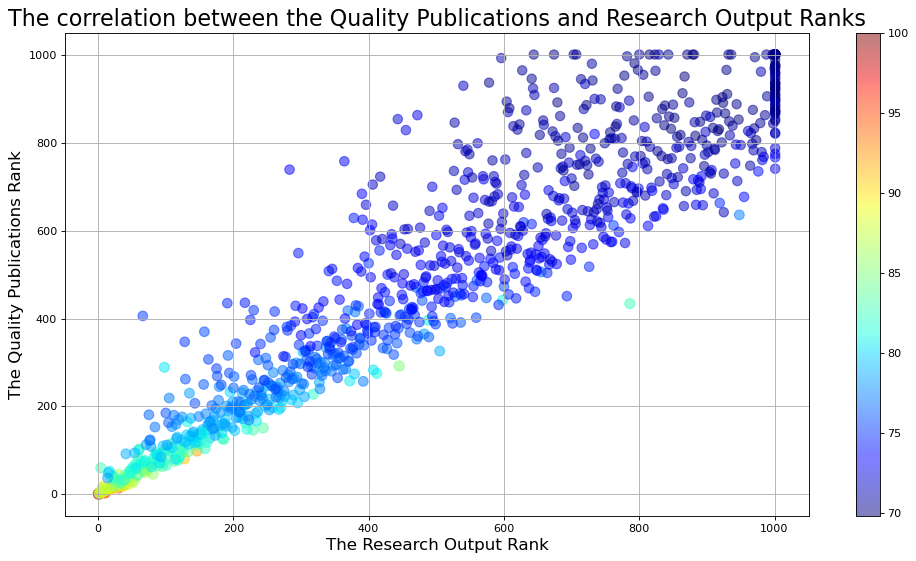

In [50]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Quality Publications on y axis and Research Output on y axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7['Research Output'], df7['Quality Publications'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Quality Publications Rank", fontsize=15)

# Setting x axis label
plt.xlabel ("The Research Output Rank", fontsize=15)

# Setting the title of plot
plt.title ("The correlation between the Quality Publications and Research Output Ranks", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Quality_Publications_VS_Research_Output")

# Showing the plot on the screen
plt.show()

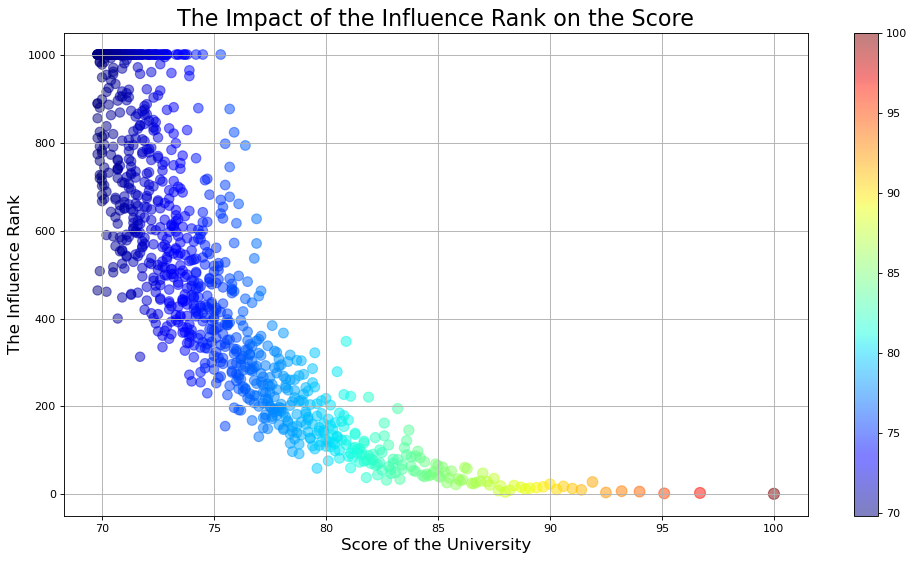

In [51]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Influence on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['Influence'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Influence Rank", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of the Influence Rank on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Influence_VS_Score")

# Showing the plot on the screen
plt.show()

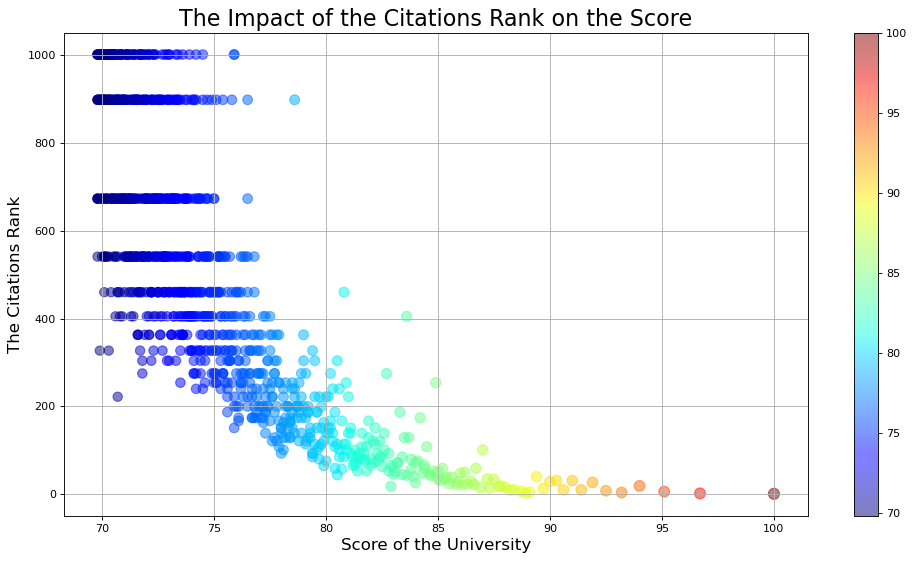

In [52]:
#Setting figure size and resolution
plt.figure(figsize=(15,8), dpi=80)

#Plotting the scatter with Citations on y axis and Score on x axis, setting alpha on 0.5 can help us to recognize data aggregation
ax= plt.scatter(df7.Score, df7['Citations'] , s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

#Showing the color Bar
plt.colorbar(ax)

# Setting y axis label
plt.ylabel ("The Citations Rank", fontsize=15)

# Setting x axis label
plt.xlabel ("Score of the University", fontsize=15)

# Setting the title of plot
plt.title ("The Impact of the Citations Rank on the Score", fontsize=20)

# Showing grid on the screen
plt.grid()

# Saving the figure
plt.savefig("Citations_VS_Score")

# Showing the plot on the screen
plt.show()

In [53]:
#Copying dataframe to new dataframe
df7_zero = df2.copy()
df7_zero

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,NaN,1001,NaN,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,NaN,1001,NaN,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,NaN,1001,NaN,881,1001,1001,898,69.8


In [54]:
#Replacing NaN values with 0
df7_zero['Quality of Education'] = df7_zero['Quality of Education'].replace(np.NaN, 0 )
df7_zero['Quality of Faculty'] = df7_zero['Quality of Faculty'].replace(np.NaN, 0 )
df7_zero

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,0,1001,0,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,0,1001,0,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,0,1001,0,881,1001,1001,898,69.8


In [55]:
#Changing the columns types
df7_zero['Alumni Employment'] = df7_zero['Alumni Employment'].astype('int')
df7_zero['Research Output'] = df7_zero['Research Output'].astype('int')
df7_zero['Quality Publications'] = df7_zero['Quality Publications'].astype('int')
df7_zero['Quality of Education'] = df7_zero['Quality of Education'].astype('int')
df7_zero['Quality of Faculty'] = df7_zero['Quality of Faculty'].astype('int')
df7_zero['Influence'] = df7_zero['Influence'].astype('int')
df7_zero['Citations'] = df7_zero['Citations'].astype('int')
df7_zero['Location']= df7_zero['Location'].astype(pd.StringDtype())

In [56]:
df7_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   string 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   int32  
 5   Alumni Employment     1000 non-null   int32  
 6   Quality of Faculty    1000 non-null   int32  
 7   Research Output       1000 non-null   int32  
 8   Quality Publications  1000 non-null   int32  
 9   Influence             1000 non-null   int32  
 10  Citations             1000 non-null   int32  
 11  Score                 1000 non-null   float64
dtypes: float64(1), int32(7), int64(2), object(1), string(1)
memory usage: 66.5+ KB


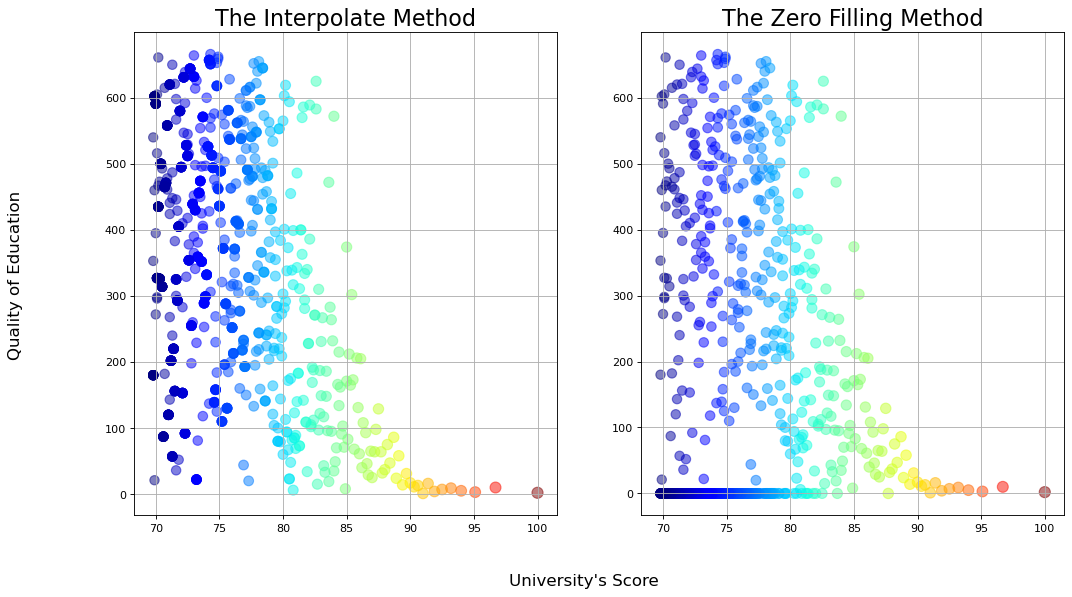

In [57]:
#Setting figure size and resolution
fig = plt.figure(figsize=(15,8), dpi=80)

# The first subplot is added on the top left which is related to interpolate method
ax1= fig.add_subplot(121)

#First, we define x,y for scatter plot of Quality of Education and Score
a = df7.Score
b = df7['Quality of Education']

#Plotting the scatter with Score on x axis and Quality of Faculty (Interpolate Method) on y axis, setting alpha on 0.5 can help us to recognize data aggregation
plt.scatter(a, b, s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

# Setting the title of plot
ax1.set_title('The Interpolate Method', fontsize=20)

# Showing grid on the screen
plt.grid()

#####################################################

# The second subplot is added on the top right which is related to Zero filling method
ax2= fig.add_subplot(122)

#First, we define x,y for scatter plot of Quality of Education and Score
a = df7_zero.Score
b = df7_zero['Quality of Education']

#Plotting the scatter with Score on x axis and Quality of Faculty (Zero filling Method) on y axis, setting alpha on 0.5 can help us to recognize data aggregation
plt.scatter(a, b, s=df7_zero.Score, c=df7_zero.Score, cmap='jet', alpha=0.5)

# Setting the title of plot
ax2.set_title('The Zero Filling Method', fontsize=20)

# Showing grid on the screen
plt.grid()

#Setting common x-axis label for both figures
fig.supxlabel("University's Score", fontsize=15)

#Setting common y-axis label for both figures
fig.supylabel("Quality of Education", fontsize=15)

#Saving the figure
plt.savefig('Quality of Education_VS_Score_Filling Methods Compare')

# Showing the plot on the screen
plt.show()

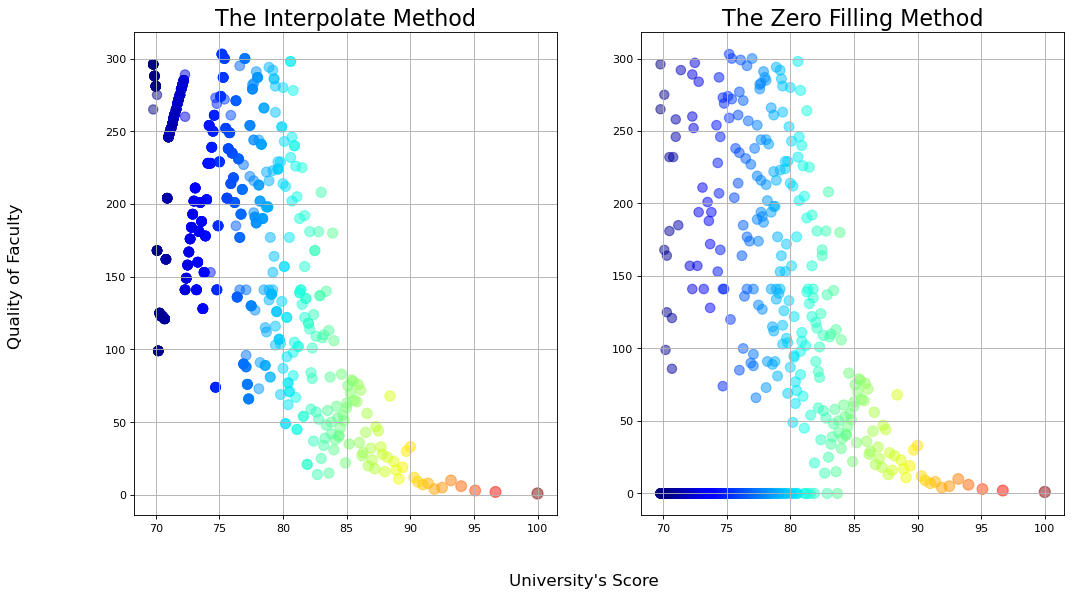

In [58]:
#Setting figure size and resolution
fig = plt.figure(figsize=(15,8), dpi=80)

# The first subplot is added on the top left which is related to interpolate method
ax1= fig.add_subplot(121)

#First, we define x,y for scatter plot of Quality of Faculty and Score
a = df7.Score
b = df7['Quality of Faculty']

#Plotting the scatter with Score on x axis and Quality of Faculty (Interpolate Method) on y axis, setting alpha on 0.5 can help us to recognize data aggregation
plt.scatter(a, b, s=df7.Score, c=df7.Score, cmap='jet', alpha=0.5)

# Setting the title of plot
ax1.set_title('The Interpolate Method', fontsize=20)

# Showing grid on the screen
plt.grid()

#####################################################

# The second subplot is added on the top right which is related to Zero filling method
ax2= fig.add_subplot(122)

#First, we define x,y for scatter plot of Quality of Faculty and Score
a = df7_zero.Score
b = df7_zero['Quality of Faculty']

#Plotting the scatter with Score on x axis and Quality of Faculty (Zero filling Method) on y axis, setting alpha on 0.5 can help us to recognize data aggregation
plt.scatter(a, b, s=df7_zero.Score, c=df7_zero.Score, cmap='jet', alpha=0.5)

# Setting the title of plot
ax2.set_title('The Zero Filling Method', fontsize=20)

# Showing grid on the screen
plt.grid()

#Setting common x-axis label for both figures
fig.supxlabel("University's Score", fontsize=15)

#Setting common y-axis label for both figures
fig.supylabel("Quality of Faculty", fontsize=15)

#Saving the figure
plt.savefig('Quality of Faculty_VS_Score_Filling Methods Compare')

# Showing the plot on the screen
plt.show()

In [59]:
# Eliminate the institution name column from the dataset
df7_zero = df7_zero.drop(columns='Institution')
df7_zero

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,USA,1,2,1,1,1,1,1,1,100.0
1,2,USA,2,10,3,2,10,4,3,2,96.7
2,3,USA,3,3,11,3,30,15,2,6,95.1
3,4,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Pakistan,3,0,1001,0,1001,1001,464,673,69.8
996,997,India,17,353,716,296,798,966,1001,1001,69.8
997,998,Japan,56,0,1001,0,1001,1001,811,673,69.8
998,999,South Korea,35,0,1001,0,881,1001,1001,898,69.8


In [60]:
############################################Checking Noises###################################################################

In [61]:
df7

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,USA,1,2,1,1,1,1,1,1,100.0
1,2,USA,2,10,3,2,10,4,3,2,96.7
2,3,USA,3,3,11,3,30,15,2,6,95.1
3,4,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Macau,1,180,512,296,883,816,1001,1001,69.8
996,996,Pakistan,3,180,1001,296,1001,1001,464,673,69.8
997,998,Japan,56,180,1001,296,1001,1001,811,673,69.8
998,999,South Korea,35,180,1001,296,881,1001,1001,898,69.8


In [62]:
#The Alumni Employment feature noises are identified:
#1) Alumni Employment around 200 and Score > 90
#2) 600<Alumni Employment<800 and 85 < Score < 90

#Finding the first set of noises
Alumni_Employment_Noise_1 = df7[((df7['Alumni Employment'] >=190) & (df7['Alumni Employment'] <=200)) & (df7['Score'] > 90)]
Alumni_Employment_Noise_1

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
8,9,USA,7,1,200,7,127,81,13,31,91.0


In [63]:
#Finding the second set of noises
Alumni_Employment_Noise_2 = df7[((df7['Alumni Employment'] >=600) & (df7['Alumni Employment'] <=800)) & ((df7['Score'] >= 85)& (df7['Score'] <= 90))]
Alumni_Employment_Noise_2

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
20,21,United Kingdom,3,32,739,28,5,7,19,19,87.8
36,38,Canada,3,173,699,78,25,27,37,24,85.5


In [64]:
#The Research Output feature noises are identified:
#1) Research Output= 598 and 80 < Score < 83 
#2) 400 < Research Output < 600 and Score = 85
#3) 780 < Research Output < 800 and 80 < Score < 85 

#Finding the first set of noises
Research_Output_Noise_1 = df7[((df7['Research Output'] >=400) & (df7['Research Output'] <=600)) & (df7['Score'] >= 84)]
Research_Output_Noise_1

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
43,45,Israel,1,8,1001,22,445,292,69,254,84.9


In [65]:
#Finding the second set of noises
Research_Output_Noise_2 = df7[(df7['Research Output'] == 598) & ((df7['Score'] >= 80) & (df7['Score'] <= 83))]
Research_Output_Noise_2

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
103,117,France,6,6,627,82,598,442,227,460,80.8


In [66]:
#Finding the third set of noises
Research_Output_Noise_3 = df7[((df7['Research Output'] >=780) & (df7['Research Output'] <=800)) & ((df7['Score'] >= 80) & (df7['Score'] <= 85))]
Research_Output_Noise_3

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
72,76,USA,44,15,1001,14,786,434,32,275,82.7


In [67]:
#The Quality Publications feature noises are identified:
#1) 300 < Quality Publications < 450 and 80 < Score < 85 
#2) 600 < Quality Publications and 75 < Score < 80
#3) 400 < Quality Publications < 500 and 700 < Research Output < 800

#Finding the first set of noises
Quality_Publications_Noise_1 = df7[((df7['Quality Publications'] >=300) & (df7['Quality Publications'] <=450)) & ((df7['Score'] >= 80) & (df7['Score'] <= 85))]
Quality_Publications_Noise_1

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
72,76,USA,44,15,1001,14,786,434,32,275,82.7
102,116,France,5,85,5,240,488,396,348,254,80.9
103,117,France,6,6,627,82,598,442,227,460,80.8


In [68]:
#Finding the second set of noises
Quality_Publications_Noise_2 = df7[(df7['Quality Publications'] >= 600) & ((df7['Score'] >= 75) & (df7['Score'] <= 80))]
Quality_Publications_Noise_2

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
177,250,USA,90,20,251,66,948,636,217,405,77.3
193,331,France,17,315,7,214,1001,1001,824,1001,75.9
513,373,USA,117,372,508,287,762,612,340,405,75.3


In [69]:
#Finding the third set of noises
Research_Output_Noise_3 = df7[((df7['Research Output'] >=700) & (df7['Research Output'] <=800)) & ((df7['Quality Publications'] >= 400) & (df7['Quality Publications'] <= 500))]
Research_Output_Noise_3

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
72,76,USA,44,15,1001,14,786,434,32,275,82.7


In [70]:
#The Citations feature noises are identified:
#1) 200 < Citations and  Score = 85 
#2) 400 <= Citations  and 80 < Score < 82

#Finding the first set of noises
Citations_Noise_1 = df7[(df7['Citations'] >= 200) & (df7['Score'] >= 84) ]
Citations_Noise_1

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
43,45,Israel,1,8,1001,22,445,292,69,254,84.9


In [71]:
#Finding the first set of noises
Citations_Noise_2 = df7[(df7['Citations'] >= 400) & ((df7['Score'] >= 80) & (df7['Score'] <= 85)) ]
Citations_Noise_2

,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
58,61,Israel,2,19,400,15,177,143,122,405,83.6
103,117,France,6,6,627,82,598,442,227,460,80.8


In [72]:
#Calculating the mean of world rank for each country
Counts = df7.groupby(['Location']).mean().reset_index()
Countries = Counts[['Location', 'World Rank']].copy()
Countries

,Location,World Rank
0,Argentina,533.333333
1,Australia,363.400000
2,Austria,564.545455
3,Belgium,356.444444
4,Brazil,648.550000
...,...,...
56,Turkey,730.846154
57,USA,384.065728
58,Uganda,771.000000
59,United Kingdom,425.258065


In [73]:
#Adding a column to dataframe to conver location to it's rank
df7.insert(0, 'Location-Rank', 0)

In [74]:
df7

,Location-Rank,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,0,1,USA,1,2,1,1,1,1,1,1,100.0
1,0,2,USA,2,10,3,2,10,4,3,2,96.7
2,0,3,USA,3,3,11,3,30,15,2,6,95.1
3,0,4,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,0,5,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,995,Macau,1,180,512,296,883,816,1001,1001,69.8
996,0,996,Pakistan,3,180,1001,296,1001,1001,464,673,69.8
997,0,998,Japan,56,180,1001,296,1001,1001,811,673,69.8
998,0,999,South Korea,35,180,1001,296,881,1001,1001,898,69.8


In [75]:
# Assigning the Location-rank values with the mean of world-rank
for i in df7['Location']:
    for j in Countries['Location']:
        if i == j:
            a = Countries.loc[Countries.Location==j]
            df7['Location-Rank'].loc[df7['Location'] == j] = int(a['World Rank'].values)

C:\Users\Hadi\AppData\Local\Temp\ipykernel_13472\3944162041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Location-Rank'].loc[df7['Location'] == j] = int(a['World Rank'].values)


In [76]:
df7

,Location-Rank,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,384,1,USA,1,2,1,1,1,1,1,1,100.0
1,384,2,USA,2,10,3,2,10,4,3,2,96.7
2,384,3,USA,3,3,11,3,30,15,2,6,95.1
3,425,4,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,425,5,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,Macau,1,180,512,296,883,816,1001,1001,69.8
996,904,996,Pakistan,3,180,1001,296,1001,1001,464,673,69.8
997,630,998,Japan,56,180,1001,296,1001,1001,811,673,69.8
998,576,999,South Korea,35,180,1001,296,881,1001,1001,898,69.8


In [77]:
#Adding a column to dataframe to conver location to it's rank
df7_zero.insert(0, 'Location-Rank', 0)

In [78]:
# Assigning the Location-rank values with the mean of world-rank
for i in df7_zero['Location']:
    for j in Countries['Location']:
        if i == j:
            a = Countries.loc[Countries.Location==j]
            df7_zero['Location-Rank'].loc[df7_zero['Location'] == j] = int(a['World Rank'].values)

C:\Users\Hadi\AppData\Local\Temp\ipykernel_13472\4184389717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7_zero['Location-Rank'].loc[df7_zero['Location'] == j] = int(a['World Rank'].values)


In [79]:
df7_zero

,Location-Rank,World Rank,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,384,1,USA,1,2,1,1,1,1,1,1,100.0
1,384,2,USA,2,10,3,2,10,4,3,2,96.7
2,384,3,USA,3,3,11,3,30,15,2,6,95.1
3,425,4,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,425,5,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,904,996,Pakistan,3,0,1001,0,1001,1001,464,673,69.8
996,740,997,India,17,353,716,296,798,966,1001,1001,69.8
997,630,998,Japan,56,0,1001,0,1001,1001,811,673,69.8
998,576,999,South Korea,35,0,1001,0,881,1001,1001,898,69.8


In [80]:
#Defining new dataframes withput location and world rank columns
df_interpolate = df7.drop(['World Rank', 'Location'], axis=1)
df_zero = df7_zero.drop(['World Rank', 'Location'], axis=1)